# Epsilon greedy bandit algorithm

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
BANDIT_PROBABILIYIES = [0.2, 0.5, 0.75]
loops = 10000

In [18]:
class bandit:
    def __init__(self, p):
        self.p = p
        self.N = 0.0
        self.estimate = 0.0

    def pull(self):
        return np.random.rand() < self.p

    def update(self, X_n):
        self.N+=1
        self.estimate = self.estimate + 1/self.N*(X_n - self.estimate)

In [37]:
def epsilon_experiment(duration):
    epsilon = 0.1
    reward = np.zeros((duration, 1))
    sum_reward = 0
    bandits = [bandit(p) for p in BANDIT_PROBABILIYIES]
    b_chosen = {i+1:0 for i in range(len(bandits))}

    for i in range(duration):
        if np.random.rand() < epsilon:
            neo = np.random.choice(3)
        else:
            neo = np.argmax([b.estimate for b in bandits])
        play = bandits[neo].pull()
        bandits[neo].update(play)
        b_chosen[neo+1]+=1
        sum_reward += play
        reward[i] = sum_reward/(i+1)

    print(b_chosen)
    plt.plot(reward)
    plt.axhline(y = max(BANDIT_PROBABILIYIES), color = 'r', linestyle = '-')
    plt.axhline(y = 1, color = 'g', linestyle = '-')
    plt.show()

{1: 303, 2: 323, 3: 9374}


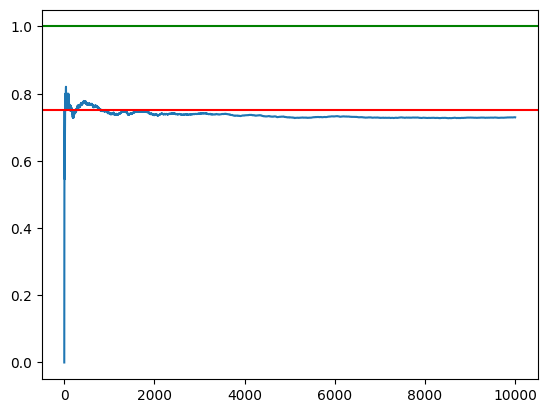

In [38]:
epsilon_experiment(loops)

## Epsilon greedy - decaying epsilon

In [39]:
def epsilon_decay_experiment(duration):
    epsilon = 0.1
    reward = np.zeros((duration, 1))
    sum_reward = 0
    bandits = [bandit(p) for p in BANDIT_PROBABILIYIES]
    b_chosen = {i+1:0 for i in range(len(bandits))}

    for i in range(duration):
        if np.random.rand() < epsilon*np.exp(-i/100):
            neo = np.random.choice(3)
        else:
            neo = np.argmax([b.estimate for b in bandits])
        play = bandits[neo].pull()
        bandits[neo].update(play)
        b_chosen[neo+1]+=1
        sum_reward += play
        reward[i] = sum_reward/(i+1)

    print(b_chosen)
    plt.plot(reward)
    plt.axhline(y = max(BANDIT_PROBABILIYIES), color = 'r', linestyle = '-')
    plt.axhline(y = 1, color = 'g', linestyle = '-')
    plt.show()

{1: 54, 2: 4, 3: 9942}


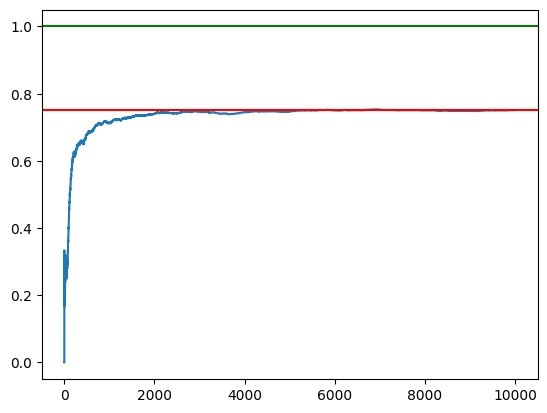

In [40]:
epsilon_decay_experiment(loops)

# Thompson sampling algo

In [41]:
from scipy.stats import beta

In [58]:
class bandit:
    def __init__(self, p):
        self.p = p
        self.N = 0.0
        self.a = 1.0
        self.b = 1.0

    def pull(self):
        return np.random.rand() < self.p

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, X_n):
        self.N+=1
        self.a+=X_n
        self.b+=1-X_n

In [61]:
def beta_expiriment(duration):
    bandits = [bandit(p) for p in BANDITS_PROBABILIYIES]
    b_chosen = {i+1:0 for i in range(len(bandits))}
    time_stops = [2, 10, 50, 200, 1000, 5000]
    reward = np.zeros((duration, 1))
    sum_reward = 0
    x = np.linspace(0,1, 200)

    plt.figure(figsize = (8, 12))
    for i in range(duration):
        neo = np.argmax([b.sample() for b in bandits]) #0,1,2
        b_chosen[neo+1] += 1
        play = bandits[neo].pull()
        bandits[neo].update(play)
        sum_reward+=play
        reward[i] = sum_reward/(i+1)
        if i+1 in time_stops:
            plt.subplot(3,2,time_stops.index(i+1)+1)
            for j in range(len(bandits)):
                plt.plot(x, beta.pdf(x, bandits[j].a, bandits[j].b))
                plt.legend([f"bandit {i+1}" for i in range(len(bandits))])


    print(b_chosen)
    plt.figure(figsize = (6,5))
    plt.plot(reward)
    plt.axhline(y = max(BANDIT_PROBABILIYIES), color = 'r', linestyle = '-')
    plt.axhline(y = 1, color = 'g', linestyle = '-')
    plt.show()


{1: 13, 2: 39, 3: 9948}


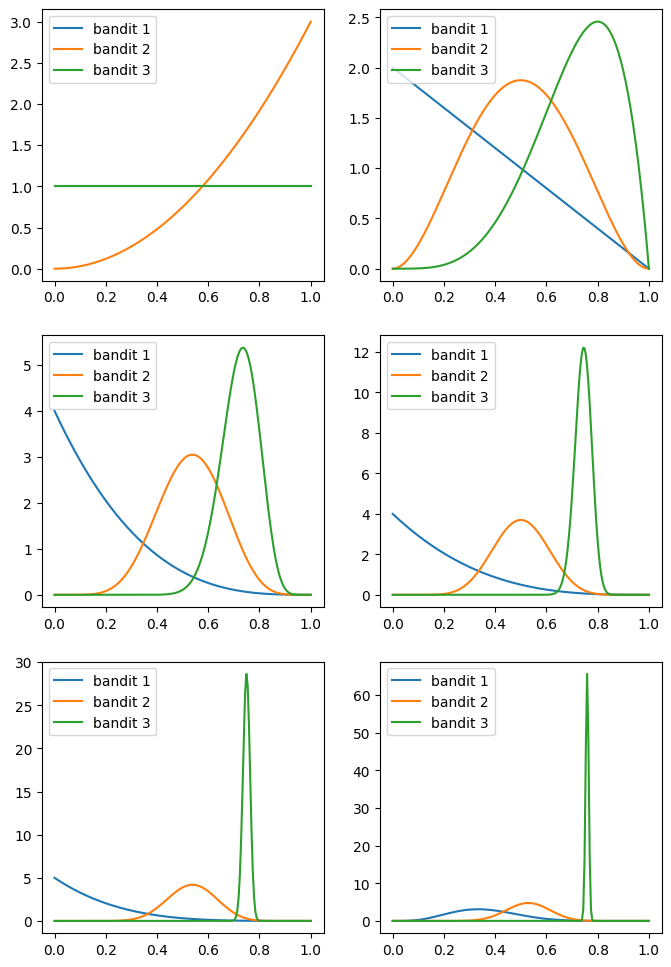

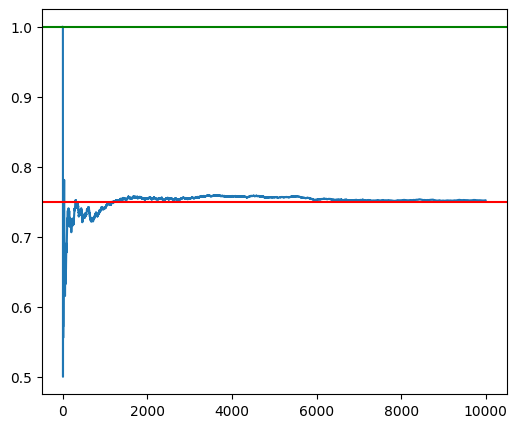

In [62]:
beta_expiriment(loops)

# Gaussian rewards - Thompson sampling

In [94]:
from scipy.stats import norm
True_Bandit_Means = [1,2,3]
loops = 1000

In [65]:
class bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.tau_lambda = 1
        self.tau_x = 1
        self.sum_x = 0
        self.N = 0

    def pull(self):
        return np.random.normal(loc = self.true_mean, scale = 1/np.sqrt(self.tau_x))

    def sample(self):
        return np.random.normal(loc = self.predicted_mean, scale = 1/np.sqrt(self.tau_lambda))

    def update(self, x):
        self.tau_lambda += self.tau_x
        self.N+=1
        self.sum_x += x
        self.predicted_mean = self.sum_x*self.tau_x/self.tau_lambda

In [97]:
def gaussian_rewards_experiment(duration):
    bandits = [bandit(mu) for mu in True_Bandit_Means]
    chosen_bandits = {i+1:0 for i in range(len(bandits))}
    rewards = np.zeros((duration, 1))
    reward_sum = 0
    time_stops = [2, 10, 50,100, 500, 1000]
    x = np.linspace(-2,6, 200)

    plt.figure(figsize = (8, 12))
    for i in range(duration):
        neo = np.argmax([b.sample() for b in bandits])
        play = bandits[neo].pull()
        bandits[neo].update(play)
        reward_sum += play
        rewards[i] = reward_sum/(i+1)
        chosen_bandits[neo+1] += 1


        if i+1 in time_stops:
            plt.subplot(3,2,time_stops.index(i+1)+1)
            for j in range(len(bandits)):
                plt.plot(x, norm.pdf(x, bandits[j].predicted_mean, 1/np.sqrt(bandits[j].tau_lambda)))
            plt.title(f"iteration = {i+1}")
            plt.legend([f"bandit {i+1}" for i in range(len(bandits))])


    print(chosen_bandits)
    plt.figure(figsize = (6,5))
    plt.plot(rewards)
    plt.axhline(y = max(True_Bandit_Means), color = 'r', linestyle = '-')
    plt.show()

{1: 6, 2: 3, 3: 991}


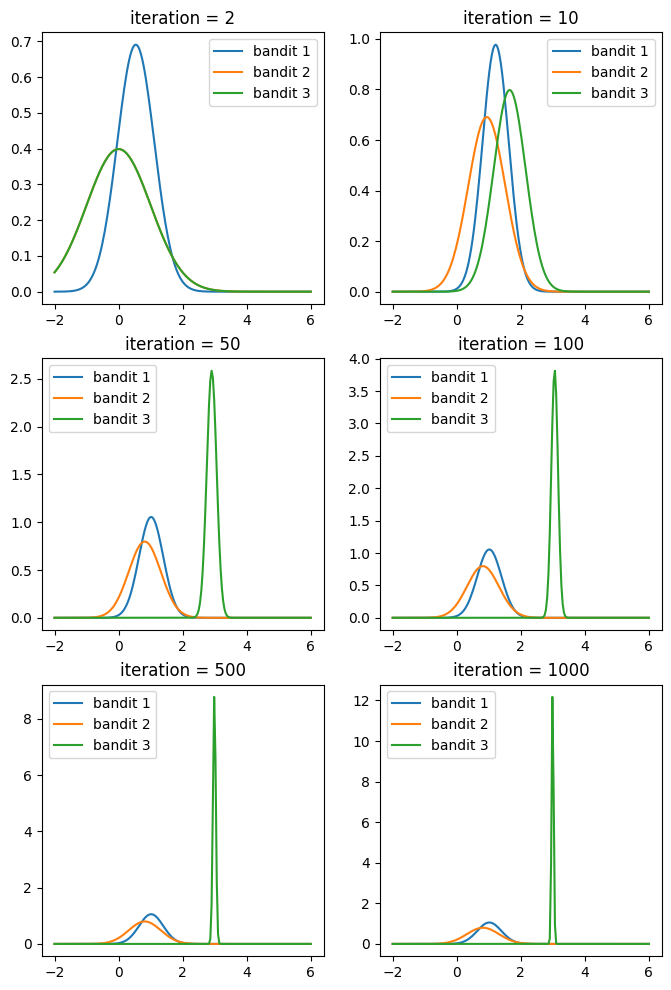

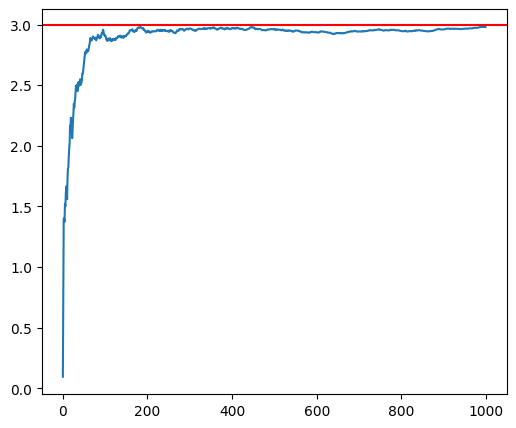

In [98]:
gaussian_rewards_experiment(loops)